In [2]:
from __future__ import print_function, unicode_literals

import numpy as np
import scipy as sp
import math as mh
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

ImportError: No module named 'seaborn'

## 1. Основы NumPy

**N. Все упражнения ниже нужно делать без использования циклов**

**1.** Cоздать вектор

$$(2, \frac{2^2}{2}, \ldots, \frac{2^{20}}{20})$$

Можно использовать функции [np.arange()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html), [np.ones()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html)

In [47]:
ar=np.arange(1.0,21.0,1)
br=np.ones(20)+1.0
cr=(br**ar)/ar
print(cr)

[  2.00000000e+00   2.00000000e+00   2.66666667e+00   4.00000000e+00
   6.40000000e+00   1.06666667e+01   1.82857143e+01   3.20000000e+01
   5.68888889e+01   1.02400000e+02   1.86181818e+02   3.41333333e+02
   6.30153846e+02   1.17028571e+03   2.18453333e+03   4.09600000e+03
   7.71011765e+03   1.45635556e+04   2.75941053e+04   5.24288000e+04]


**2.** Посчитать:

$$\sum\limits_{i=0}^{5}{0.1^{3i}0.2^{4i}}$$


**3.** Создать нулевую матрицe $8 \times 8$, и заполнить её единицами в шахматном порядке.

In [54]:
ar=np.arange(0,6)
ones1=np.ones(6)*0.1
ones2=np.ones(6)*0.2
cr=(ones1**(ar*3))*(ones2**(ar*4))
print(cr.sum())

1.0000016


In [59]:
ar=np.zeros((8,8))
br=np.arange(1,65).reshape(8,8)
print((ar+br)%2)

[[ 1.  0.  1.  0.  1.  0.  1.  0.]
 [ 1.  0.  1.  0.  1.  0.  1.  0.]
 [ 1.  0.  1.  0.  1.  0.  1.  0.]
 [ 1.  0.  1.  0.  1.  0.  1.  0.]
 [ 1.  0.  1.  0.  1.  0.  1.  0.]
 [ 1.  0.  1.  0.  1.  0.  1.  0.]
 [ 1.  0.  1.  0.  1.  0.  1.  0.]
 [ 1.  0.  1.  0.  1.  0.  1.  0.]]


**4.** Есть 5 точек в декартовой системе координат (в виде матрицы $X$ размерностью $5 \times 2$), сконвертируйте эти точки в полярную систему координат.

In [94]:
X = np.random.random((5, 2))
r=np.sqrt((X[:,0]**2)*(X[:,1]**2))
phi=np.arctan2((X[:,0]),(X[:,1]))
result=np.column_stack((r, phi))
print(result)

[[ 0.18346507  0.35859299]
 [ 0.85337111  0.78706566]
 [ 0.31517434  0.8364674 ]
 [ 0.00918402  1.51437805]
 [ 0.00250171  1.56150067]]


**5.** Найдите индексы максимального элемента в случайной матрице $10 \times 10$.

Cм. [np.argmax()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html).

In [123]:
X = np.random.random((10,10))
r=(np.argmax(X))
print(r,X, r//10,r%10)

21 [[ 0.8140976   0.57993489  0.77458427  0.43440189  0.4829512   0.73217776
   0.9608568   0.23382322  0.4714872   0.69466482]
 [ 0.83599849  0.75380531  0.25301224  0.44210996  0.60360802  0.38438997
   0.85356011  0.70819213  0.71453863  0.24094939]
 [ 0.0092251   0.99981566  0.45255463  0.11728176  0.93306564  0.57720379
   0.48716393  0.59342911  0.20332445  0.62105504]
 [ 0.13157338  0.06658228  0.16891171  0.03052679  0.9690033   0.26610413
   0.47161317  0.05037738  0.78942966  0.28595567]
 [ 0.38691154  0.19429281  0.31811083  0.74752425  0.72980084  0.84994177
   0.20667027  0.73480196  0.0371184   0.49814186]
 [ 0.37064761  0.47212176  0.39580788  0.88594509  0.51794656  0.37066838
   0.52795178  0.59474541  0.43526531  0.8035893 ]
 [ 0.50607418  0.92227071  0.48303639  0.92419707  0.10754735  0.86513416
   0.5227406   0.76080302  0.05149867  0.58332802]
 [ 0.73362072  0.66818212  0.01042445  0.21258499  0.81812184  0.41837467
   0.39224257  0.5775432   0.26218107  0.5279185

**6.** Есть 10 точек ($X$) и ещё одна ($y$). Найти в $X$ ближайшую к $y$ точку.

In [120]:
X = np.random.random((10, 2))
y = np.random.random((1, 2))
r = np.sqrt(((X[:,0]-y[0][0])**2)*((X[:,1]-y[0][1])**2))
mm=np.argmin(r)
print(X[mm])

[ 0.38015394  0.48359705]


**7.** Дана функция:

$$
 \begin{cases}
    x^2 + 2x + 6, & x < 0  \\
    x + 6, & 0 \le x \le 2 \\
    x^2 + 4x - 4, & x \ge 2
 \end{cases}
$$

Постройте ёё график на промежутке $-3<x < 3$.

In [146]:
def f(x):
    if x<0:
        return x**2 +2*x +6
    if x>=0 and x<=2:
        return x+6
    if x>2:
        return x**2 + 4*x -4
    
vfunc = np.vectorize(f)
xlist=np.arange(-3,3,0.01)
ylist=vfunc(xlist)
plt.plot(xlist, ylist)
plt.show()

**8.** Из каждого элемента матрицы вычесть среднее арифметическое от всех элементов в соответствующей строке (после чего среднее значение каждой строки должно равняться нулю).

Cм. [np.mean()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html).

In [160]:
X = np.random.random((10, 10))
Srarifm=np.mean(X,axis=1).reshape(10,1)
X_Srarifm=X-Srarifm
Prov=np.mean(X_Srarifm,axis=1).reshape(10,1)
print(X,'\n',Srarifm,'\n',X_Srarifm,'\n',Prov)


[[ 0.47406951  0.37850138  0.42648338  0.50594417  0.57617072  0.51910093
   0.32709316  0.56007955  0.31251799  0.10150782]
 [ 0.79258688  0.63848827  0.53941015  0.65035921  0.02176564  0.89824373
   0.25597168  0.43111702  0.73143388  0.98616843]
 [ 0.23798822  0.98119783  0.95073014  0.85864102  0.20064717  0.22176839
   0.523737    0.11373741  0.95421981  0.60106229]
 [ 0.71187818  0.61965169  0.74174029  0.34171228  0.04125429  0.88212686
   0.9433995   0.31888347  0.25693444  0.46445153]
 [ 0.76792586  0.11349885  0.97078509  0.73090228  0.72845728  0.45977714
   0.65013493  0.59448618  0.41228383  0.07644214]
 [ 0.31636126  0.4280292   0.95348642  0.7032639   0.79281719  0.12948541
   0.17458551  0.45384093  0.13311669  0.96742371]
 [ 0.35481481  0.89888084  0.14907038  0.24377447  0.69445956  0.6845065
   0.45795154  0.4345314   0.21174599  0.63164194]
 [ 0.10114483  0.93284734  0.197672    0.80329199  0.38262841  0.38127195
   0.7591633   0.22390039  0.37362672  0.88347558]
 

**9.** Есть массив из 1000 чисел, полученных из генератора случайных чисел, имеющий нормальное распределение. Посчитайте выборочное среднее и выборочную дисперсию. 

In [163]:
X = np.random.normal(loc=5, scale=2., size=1000)
VibSredform=(np.sum(X))/1000
VibDispform=(np.sum((X-VibSred)**2))/1000
VibSredmeth=np.mean(X)
VibDispmeth=np.var(X)
print(VibSredform,VibDispform,VibSredmeth,VibDispmeth)

5.11163862221 3.97579036139 5.11163862221 3.95038514732


**10.** Создать матрицу:

$$
\begin{pmatrix}
0 & 1 & 2 & 3 & 4 \\
1 & 2 & 3 & 4 & 0 \\
2 & 3 & 4 & 0 & 1 \\
3 & 4 & 0 & 1 & 2 \\
4 & 0 & 1 & 2 & 3
\end{pmatrix}
$$

LinAlgError: Last 2 dimensions of the array must be square

## 2. Python

**1.** Есть следующее реккурентное соотношение:
$$ x_i = 108 - \frac{815-\frac{1500}{x_{i-2}}}{x_{i-1}} $$
Напишите функцию
    
    foo(x_1, x_0, n)
    
которая вычисляет $x_n$ в зависимости от $x_0$ и $x_1$. 

Затем вычислите:

In [ ]:
from fractions import Fraction
from decimal import Decimal

def foo(x_1, x_0, n):
    ## code
    pass

v1 = foo(4.25, 4, 15)
v2 = float(foo(Fraction(17, 4), Fraction(4), 15))
v3 = float(foo(Decimal('4.25'), Decimal('4'), 15))

print(v1, v2, v3)

Из-за чего такая разница? Какой правильный ответ?

**2.** Имеется класс:

In [ ]:
class List(object):
    def __init__(self, el, nxt=None):
        self.nxt = nxt
        self.el = el
        
    def __repr__(self):
        if self.nxt:
            return 'List(%s, %s)' % (self.el, repr(self.nxt))
        return 'List(%s)' % self.el
    
lst = List(1, List(2, List(3, List(4, List(5)))))

print(lst)

Нужно написать функцию

In [ ]:
def inverse(lst):
    pass

Которая переворачивает список без создания новых вершин.

**3.** Есть класс, который представляет книгу. У книги имеется рейтинг и связи "похожести" с другими книгами. Отношение "похожести" симметрично.

In [ ]:
class Book(object):
    def __init__(self, book_id, book_rating):
        self.book_id = book_id
        self.book_rating = book_rating
        self.similar_books = []
    
    def append_similar_book(self, other):
        self.similar_books.append(other)
        other.similar_books.append(self)    
        
b1, b2, b3, b4 = Book(1, 1.1), Book(2, 1.4), Book(3, 4.0), Book(4, 5.0)

b1.append_similar_book(b2)
b2.append_similar_book(b4)
b1.append_similar_book(b2)
b3.append_similar_book(b4)


def get_most_popular_books(book, num):
    pass

Нужно реализовать 

     get_most_popular_books() 
     
максимально оптимальным образом и, конечно, попробовать оценить сложность алгоритма. Функция принимает два параметра - книгу и число книг с максимальным рейтингом, которые нужно отыскать во всей подсети "похожести" данной книги.  Иными словами - нужно обойти граф, и вернуть *num* книг с наибольшим рейтингом.

Например:

    get_most_popular_books(b1, 1) == [b4]
    
    get_most_popular_books(b1, 2) == [b4, b3]
    

**4.** Бинарное дерево задано следующим образом:

In [ ]:
class Tree(object):
    def __init__(self, val, left=None, right=None):
        self.value = val
        self.left = left
        self.right = right

Известно, что все значения (value) в дереве различны. 

Необходимо реализовать функцию 

    find_fca(tree, val1, val2)
    
которая ищет первого общего предка двух вершин с идентификаторами 
    val1
и 
    val2 
. Иными словами, необходимо реализовать функцию, которая ищет наиеньшее поддерево (в плане числа вершин), которое содержит вершины с указанными идентификаторами. 
    val1 
или 
    val2 
необязательно должны присутствовать в дереве, в таком случае нужно вернуть 
    None
 . Пример
 
    tree = Tree(5, Tree(3, Tree(2), Tree(1)), Tree(7))
    find_fca(a, 2, 7) == 5
    find_fca(a, 2, 1) == 3
    find_fca(a, 3, 1) == 3

## 3. SciPy


В SciPy есть базовые функции для обработки изображений (для более продвинутых задач стоит использовать [skimage](http://scikit-image.org) или [OpenCV](http://opencv.org) ). Загрузим цветное изображение размером (360, 480) в массив и отобразим его: 

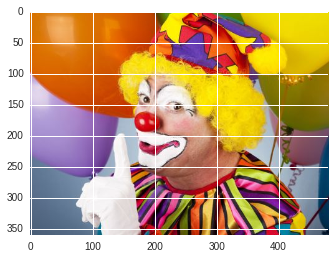

In [8]:
from scipy import misc
image = sp.misc.imread('data/man.png')
plt.imshow(image)

In [9]:
image.shape

(360, 480, 3)

Как  вижно **image** это трехмерный массив, где первые две оси координаты пикселя, третья - его цвет в виде (R,G,B). Например, цвет пиксела с координатами (5, 5):

In [10]:
image[5, 5]

array([215, 114,   0], dtype=uint8)

Обнулим G, B составляющие, и посмотрим что получится:

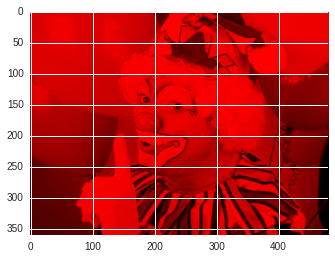

In [11]:
image[:, :, 1:] = 0.
plt.imshow(image)

С RGB работать неудобно, так что при работе и изображениями часто используют оттенки серого (grayscale). В таком случае изображение представляется в виде двумерной матрицы, где каждой элемент кодирует интенсивность соответствующего пиксела. Загрузим клоуна в grayscale:

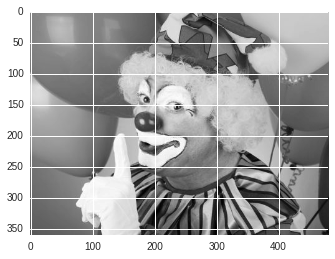

In [3]:
image = sp.misc.imread('data/man.png', flatten=True)
plt.imshow(image, cmap=plt.cm.gray)

In [12]:
image.shape

(360, 480, 3)

Как видно **plt.imshow()** понимает в каком виде изображение и отображает его соответствующим образом (cmap - это color map, задает правило отображения числа, то есть элемента матрицы, на цвет).

Задача: загрузить изображение в матрицу (grayscale), применить к матрице [сингулярное разложение (SVD)](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D0%B7%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5). Затем, [воспользовавшись замечательным свойством сингулярного разложения](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D0%B7%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5#.D0.9F.D1.80.D0.B8.D0.B1.D0.BB.D0.B8.D0.B6.D0.B5.D0.BD.D0.B8.D0.B5_.D0.BC.D0.B0.D1.82.D1.80.D0.B8.D1.86.D0.B5.D0.B9_.D0.BC.D0.B5.D0.BD.D1.8C.D1.88.D0.B5.D0.B3.D0.BE_.D1.80.D0.B0.D0.BD.D0.B3.D0.B0) посчитать и отобразить матрицы, имеющие ранг 5, 10, 100 и 200. Сделать выводы.

Для подсчета SVD можно использовать функцию [np.linalg.svd()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html).

## 4. Работа с HTML

**N: становите библиотеки requests и lxml**

**1.** Часто возникает задача извлечь какую-то полезную информацию с web-страницы, для этого есть много различных инструментов, но самое прострое решение - использование адекватного html-парсера и [XPath](https://ru.wikipedia.org/wiki/XPath). Для Python стандарт де-факто это [lxml](http://lxml.de) или более высокоуровневый [BeautifulSoup](http://www.crummy.com/software/BeautifulSoup/). Для Java можно использовать что-то вроде [jsoup](http://jsoup.org). Рассмотрим пример:

In [13]:
import lxml.html

html =  """<html>
                <header>
                </header>
                <body>
                    <div class="c1">
                        <a href="http://yandex.ru">Yandex</a>                       
                    </div>
                     <div class="c1">                        
                        <a href="http://google.ru">Google</a>
                    </div>
                    <div class="c2">                        
                        <a href="http://rambler.ru">Rambler</a>
                    </div>
                </body>
           
           </html>
        """  

tree = lxml.html.fromstring(html)
tree.xpath('//div[@class="c1"]//a/text()')

['Yandex', 'Google']

Тут мы нашли все элементы *&lt;div&gt;* у которых аттрибут *сlass* равен *с1*, в соответствующий поддеревьях нашли все элементы *&lt;a&gt;* и извлекли внутренний текст. Ещё примеры:

In [14]:
tree.xpath('//a/@href')

['http://yandex.ru', 'http://google.ru', 'http://rambler.ru']

In [15]:
tree.xpath('//div/a[@href="http://yandex.ru"]/text()')

['Yandex']

In [16]:
import requests

response = requests.get('http://yandex.ru')
#if response.status_code == 200:
html = response.text
tree = lxml.html.fromstring(html)
    
print('Главные федеральные и региональные новости со страницы Яндекса:')    
news_nodes = tree.xpath('//ul[@class="b-news-list"]/li[@class="b-news-list__item"]')
for node in news_nodes:
    print(' '.join(node.xpath('.//text()')))
    
print('\nКурсы доллара, евро и нефти:') 
stocks_node = tree.xpath('//span[@class="inline-stocks__value_inner"]/text()')
for node in stocks_node:
    print(node)

Главные федеральные и региональные новости со страницы Яндекса:
1. Крымские пограничники  задержали трех украинских десантников
2. Министр обороны Венгрии ушел  в отставку из-за наплыва беженцев
3. Число пострадавших  от урагана в Казани выросло до 19
4. Взрывное устройство не было обнаружено  на Курском вокзале Москвы
5. Сборная России потерпела  третье поражение подряд на Евробаскете
1. По факту стрельбы  из-за неудачной пластики возбудили дело
2. Из горящей квартиры  на Фурштатской спасли четырех человек
3. Полицейский пытался передать  в СИЗО «Кресты» наркотик
4. По делу об избиении активистов движения «СтопХам»  задержаны четверо
5. Портниха на Шуваловском пр.  отбилась от голого насильника молотком

Курсы доллара, евро и нефти:
69,18
77,20
47,76


Для работы с деревом HTML удобно использовать встроенные в браузер инструменты разработчика, например из Firefox можно открыть инспектор с помощью комбинации клавиш *Ctrl+Shift+C* или через плагин Firebug. Аналогичные возможности есть в Chrome. 

**Задача:**
1. Взять крупный новостной ресурс (например http://fontanka.ru, http://gazeta.ru или http://lenta.ru).
2. Скачать заголовки и время появления всех новостей за неделю.
3. Вывести top10 самых популярных слов в заголовках (использовать [pymorphy2](https://pymorphy2.readthedocs.org/) для лемматизации) 
4. Построить график сколько новостей появилось в определенное время дня - по оси $x$ час [0, 24), по оси $y$ - число новостей.

## 5. Графы

**1.** Статьи в Википедии имеют ссылки друг на друга, соответственно их можно представить в виде графа. Рассмотрим некий подграф, который содержит подмножество математических статей. 

В файле *data/wiki_graph.txt*  ориентированный граф, на каждой строчке три разделенных пробелом числа, описывающих ребро:
- id исходящей вершины
- id входящей вершины
- вес ребра (в данном случае всегда 1).

In [17]:
# 10 первых строчек из файла, работает на Linux
!!head -n 10 data/wiki_graph.txt

['1 266 1',
 '1 432 1',
 '2 28 1',
 '2 75 1',
 '2 145 1',
 '2 504 1',
 '3 331 1',
 '4 136 1',
 '4 259 1',
 '4 750 1']

Соответственно первое ребро из вершины 1 в вершину 266, второе из 1 в 432 и т.д.

В файле *data/wiki_names.txt* содержатся имена вершин

In [18]:
# 10 первых строчек из файла, работает на Linux
!!head -n 10 data/wiki_names.txt

['A Mathematical Theory of Communication',
 'APX',
 'Abel equation',
 'Abelian integral',
 'Absolute continuity',
 'Abstract semantic graph',
 'Abstraction model checking',
 'Actuarial science',
 'Adaptive mesh refinement',
 'Adaptive quadrature']

Вершина с id равным 1 имеет имя *A Mathematical Theory of Communication*, вершина с id равным  2 называется *APX* и так далее. 
Напишем код для чтения этих данных. Заметим, что использование матрицы смежности, в общем случае, не очень хорошая идея. 

In [19]:
def read_graph(filename):
    max_id = 0
    with open(filename) as f:
        for line in f:
            from_, to_ = (int(x) for x in line.strip().split()[:2])
            max_id = max(max_id, from_, to_)
            
    matrix = np.zeros((max_id, max_id))
    
    with open(filename) as f:
        for line in f:
            from_, to_ = (int(x) for x in line.strip().split()[:2])
            matrix[from_ - 1, to_ - 1] = 1.
            
    return matrix

def read_names(filename):
    with open(filename) as f:
        return [x.strip() for x in f.readlines()]

Граф можно даже отобразить с помощью библиотеки [networkx](https://networkx.github.io/)

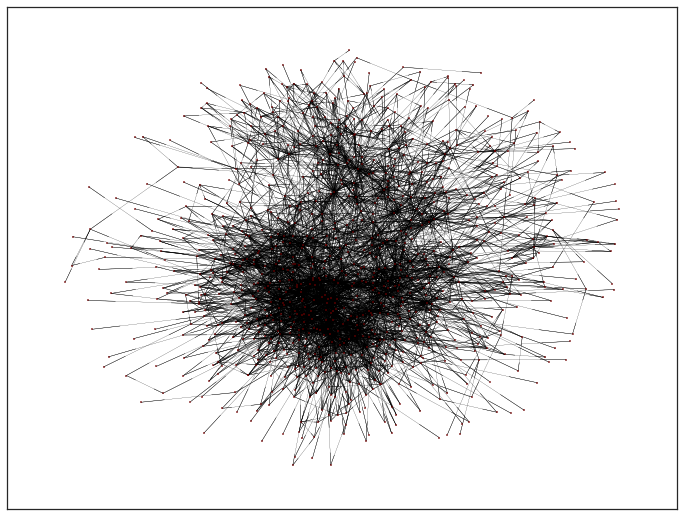

In [20]:
import networkx as nx
adj_matrix = read_graph('data/wiki_graph.txt')
G = nx.to_networkx_graph(adj_matrix, create_using=nx.DiGraph())

with sns.axes_style("white"):
    plt.figure(figsize=(12, 9))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, with_labels=False, node_size=2, width=0.1, pos=nx.spring_layout(G))

Задача: посчитать для этого графа [PageRank](https://en.wikipedia.org/wiki/PageRank) используя power iteration (метод описан в статье в Wikipedia), найти имя вершины с наибольшим значением. 

## 6. Анализ данных

Есть два набора данных:
1. [Определение фальшивых банкнот](https://archive.ics.uci.edu/ml/datasets/banknote+authentication). 
2. [Предсказание поведения доноров крови](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center). 

Нужно взять любой набор из этих данных и проанализировать (построить графики, найти что-нибудь интересное, и т.п.). 